In [8]:
#All of the imports
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, clear_output
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

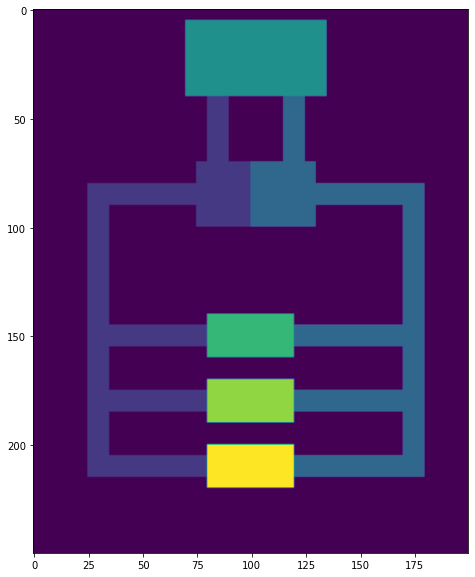

In [10]:
board = np.zeros(shape = (250,200)) # Initializing a 250 by 200 size board of color purple

# heart
board[70:100,75:100] = 1 # left part of the heart (low oxygen; blue)
board[70:100,100:130] = 2 # right part of the heart (high oxygen; teal; anatomically bigger than the left part)

# lung 
board[5:40,70:135] = 3

# organ no.1 
board[140:160,80:120] = 4

# organ no.2
board[170:190,80:120] = 5

# organ no.3
board[200:220,80:120] = 6

# veins; blue
board[40:70,80:90] = 1 # vein connecting lung and left part of the heart
board[80:90,25:75] = 1 # top vein connecting lung with organs
board[90:215,25:35] = 1 # side vein connecting lung with organs
board[145:155,35:80] = 1 # side vein organ no.1
board[175:185,35:80] = 1 # side vein organ no.2
board[205:215,35:80] = 1 # side vein organ no.3

# arteries; teal
board[40:70,115:125] = 2 # artery connecting lung and right part of the heart
board[80:90,130:180] = 2 # top artery connecting lung with organs
board[90:215,170:180] = 2 # side artery connecting lung with organs
board[145:155,120:170] = 2 # side artery organ no.1
board[175:185,120:170] = 2 # side artery organ no.2
board[205:215,120:170] = 2 # side artery organ no.3

# plotting the board
plt.figure(figsize=(20,10))
plt.imshow(board)


In [11]:
class blood_cell():
    '''
    This is the blood cells class and it allows the blood cells to move through veins and arteries as well as 
    absorb oxygen and carbon dioxide.
    '''
    
    def __init__(self, dims, color = 'red'):
        '''
        The __init__ function takes in a list of x,y coordinates (list of lists with 2 elements) and randomly chooses an
        initial position. This function also takes the color of the blood cell as an input.
        '''
        self.coords = dims 
        self.dims = random.sample(dims, 1)
        self.x = self.dims[0][0]
        self.y = self.dims[0][1]
        
        self.color = color 
        
    def transfer(self):
        '''
        Changes the color of the blood cell depending on its location on the board (lungs or an organ).
        Used to represent the exchange of oxygen and carbon dioxide.
        '''
        if 70 < self.x < 135 and 5 < self.y < 40:
            color = 'red'
            self.color = color
            
        elif 80 < self.x < 120 and ((140 < self.y < 160) or (170 < self.y < 190 ) or (200 < self.y < 220)):
            color = 'blue'
            self.color = color
        
    def draw(self):
        '''
         Draws plots the blood cell on the board using current coordinates.
        '''
        plt.scatter(self.x, self.y, c=self.color)

    
    def movement_up(self):
        '''
        Blood cells move through the veins toward the heart and the lungs.
        This is shown through the blood cell object moving 1 unit upward.
        '''
        b_dy = 1
        
        b_x = self.x 
        b_y = self.y - b_dy 
        
        self.x = b_x #blood cell coordinates update after it moves 
        self.y = b_y   
        
    def movement_down(self):
        '''
        Blood cells move through the arteries toward organs.
        This is shown through the blood cell object moving 1 unit downward.
        '''
        b_dy = 1
        
        b_x = self.x 
        b_y = self.y + b_dy 
        
        self.x = b_x #blood cell coordinates update after it moves 
        self.y = b_y
        
    def movement_right(self):
        '''
        Blood cells move through the arteries toward organs.  
        This is shown through the blood cell object moving 1 unit to the right. 
        '''
        
        b_dx = 1 
        
        b_x = self.x + b_dx
        b_y = self.y 
        
        self.x = b_x #blood cell coordinates update after it moves 
        self.y = b_y      
        
    def movement_left(self):
        '''
        Blood cells move through the arteries toward organs. 
        This is shown through the blood cell object moving 1 unit to the left. 
        '''
        
        b_dx = 1
        
        b_x = self.x - b_dx
        b_y = self.y 
        
        self.x = b_x #blood cell coordinates update after it moves 
        self.y = b_y
        
    def board_location(self):
        
        '''
        Provides the current location of the blood cell object on the board.
        '''
        
        return self.x, self.y
    
    
def blood_cell_simulation(cells):
    '''
    Blood Cell Object Movement
    '''
    fig, ax = plt.subplots(figsize=(10,5))

    for _ in range(10000):
        
        for b in cells:
    
            location = b.board_location()
        
            # movement conditions based on coordinates
            if location[1] < 85 and location[0] > 150:
                b.movement_down()
                b.transfer()
                b.draw()
        
            elif (30 <= location[0] < 85) and location[1] <= 85: 
                b.movement_right()
                b.transfer()
                b.draw()
        
            elif location[1] == 20 and location[0] == 85:
                b.movement_right()
                b.transfer()
                b.draw()
        
            elif 20 <= location[1] <=30 and location[0] >= 85 and location[0] != 120:
                b.movement_right()
                b.transfer()
                b.draw()
        
            elif location[1] <= 40 and location[0] == 120:
                b.movement_down()
                b.transfer()
                b.draw()
        
            elif location[0] == 85 and location[1] <= 85:
                b.movement_up()
                b.transfer()
                b.draw()
   
            elif location[0] == 30:
                b.movement_up()
                b.transfer()
                b.draw()

            elif location[0] < 175 and location[1] == 85:
                b.movement_right()
                b.transfer()
                b.draw()
                
            elif location[0] == 175 and location[1] < 150: 
                b.movement_down()
                b.transfer()
                b.draw()
            
            elif location[0] == 175 and location[1] == 150: #Potentially enter organ 1
                prob = random.random()
                if prob > 0.33:
                    b.movement_down()
                    b.transfer()
                    b.draw()
                else:
                    b.movement_left()
                    b.transfer()
                    b.draw()
                
            elif location[0] == 30 and location[1] == 150:
                b.movement_up()
                b.transfer()
                b.draw()
            
            elif location[1] == 150:
                b.movement_left()
                b.transfer()
                b.draw()  
        
            elif 40 < location[1] < 180: #Potentially enter organ 2 
                b.movement_down()
                b.transfer()
                b.draw()
        
            elif location[0] == 175 and location[1] == 180:
                prob = random.random()
                if prob > 0.33:
                    b.movement_down()
                    b.transfer()
                    b.draw()
                else:
                    b.movement_left()
                    b.transfer()
                    b.draw()
                    
            elif location[0] == 30 and location[1] == 180:
                b.movement_up()
                b.transfer()
                b.draw()

            elif location[1] == 180:
                b.movement_left()
                b.transfer()
                b.draw()  
    
            elif 40 < location[1] < 210: #Potentially enter organ 3 
                b.movement_down()
                b.transfer()
                b.draw()

            elif location[0] == 30 and location[1] == 210:
                b.movement_up()
                b.transfer()
                b.draw()

            elif location[1] == 210:
                b.movement_left()
                b.transfer()
                b.draw()  
    
    
        # Animation part (doesn't change)
        plt.imshow(board)
        image_path = 'The_heart.jfif'
        the_image = 'The_lungs.jpg'
        imscatter(102, 90, image_path, zoom=0.165)
        imscatter(102, 21, the_image, zoom=0.275)
        clear_output(wait=True) # Clear output for dynamic display
        display(fig)            # Reset display
        fig.clear()             # Prevent overlapping and layered plots
        time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up
    
        
        

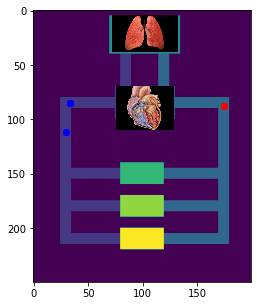

In [ ]:
# Running the simulation of a red blood cell
coords = [[100,25], [100,150], [100,180], [100,210]]
cellies = ['a', 'b', 'c', 'd']
cells = [blood_cell(coords) for x in range(10)]

blood_cell_simulation(cells)
